In [1]:
# imports
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import numpy as np
import spacy
import os
import pandas as pd
import collections
%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
### Creating DataFrame

idir = "/home/akhilesh/civicdatalab/samantar_parsers/data/txts/"
df = pd.DataFrame()
all_data = []
for filename in os.listdir(idir):
    if filename.endswith('.txt'):
        with open(idir + filename, 'r') as f:
            data = f.readlines()
        stripped_data = list(map(lambda x: x.strip(), data))
        clean_data = ' '.join(stripped_data)
        corr = (filename.split(".")[0], clean_data)
        all_data.append(corr)

df = pd.DataFrame(all_data)
df.columns = ['year', 'content']

In [4]:
df['tokenised'] = df.content.apply(lambda x: [x.text for x in nlp.tokenizer(x)])

In [5]:
from measures.len_based import average_token_length_characters
from measures.len_based import average_token_length_syllables

In [6]:
df['avg_token_len_characters'] = df['tokenised'].apply(lambda x: average_token_length_characters(x, False))

/home/akhilesh/venv/p3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [7]:
df['avg_token_length_syllables'] = df['tokenised'].apply(lambda x: average_token_length_syllables(x, stdev=False))

In [8]:
df.head()

,year,content,tokenised,avg_token_len_characters,avg_token_length_syllables
0,1973_-_1974_,SPEECH OF SHRI Y.B.CHAVAN MINISTER OF FINANCE ...,"[SPEECH, OF, SHRI, Y.B.CHAVAN, MINISTER, OF, F...",4.045793,1.433972
1,1976_-_1977_,SPEECH OF SHRI C.SUBRAMANIAM MINISTER OF FINAN...,"[SPEECH, OF, SHRI, C.SUBRAMANIAM, MINISTER, OF...",4.119379,1.451296
2,1958_-_1959_,SPEECH OF SHRI JAWAHAR LAL NEHRU PRIME MINIST...,"[SPEECH, OF, SHRI, JAWAHAR, LAL, NEHRU, , PRI...",3.883214,1.364900
3,2001_-_2002_,1 Budget 2001-2002 Speech of Shri Yash...,"[1, , Budget, , 2001, -, 2002, , Speech, ...",2.900919,1.282631
4,1995_-_1996_,1 Budget 1995-96 Speech of Shri Manmohan...,"[1, , Budget, , 1995, -, 96, , Speech, , o...",2.882617,1.274366


In [9]:
new_df = df.copy()

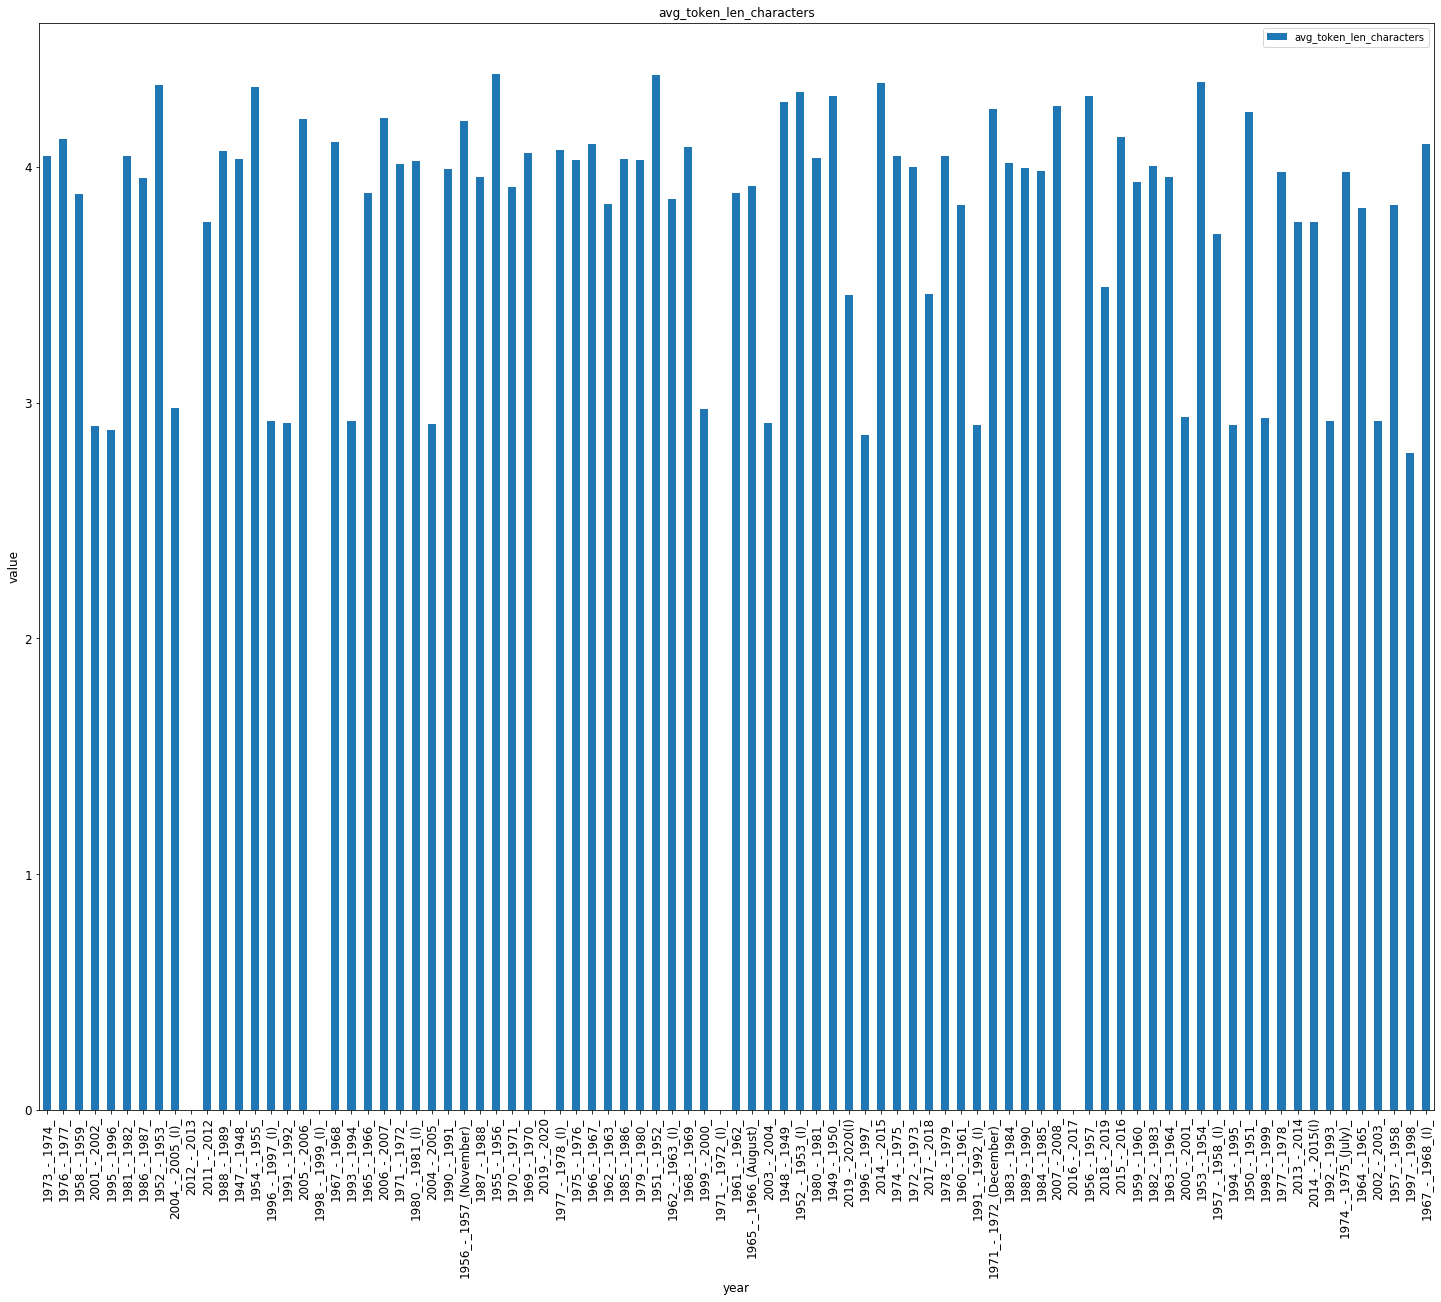

In [10]:
ax = new_df.plot(x='year', y='avg_token_len_characters', kind='bar', title ="avg_token_len_characters", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()

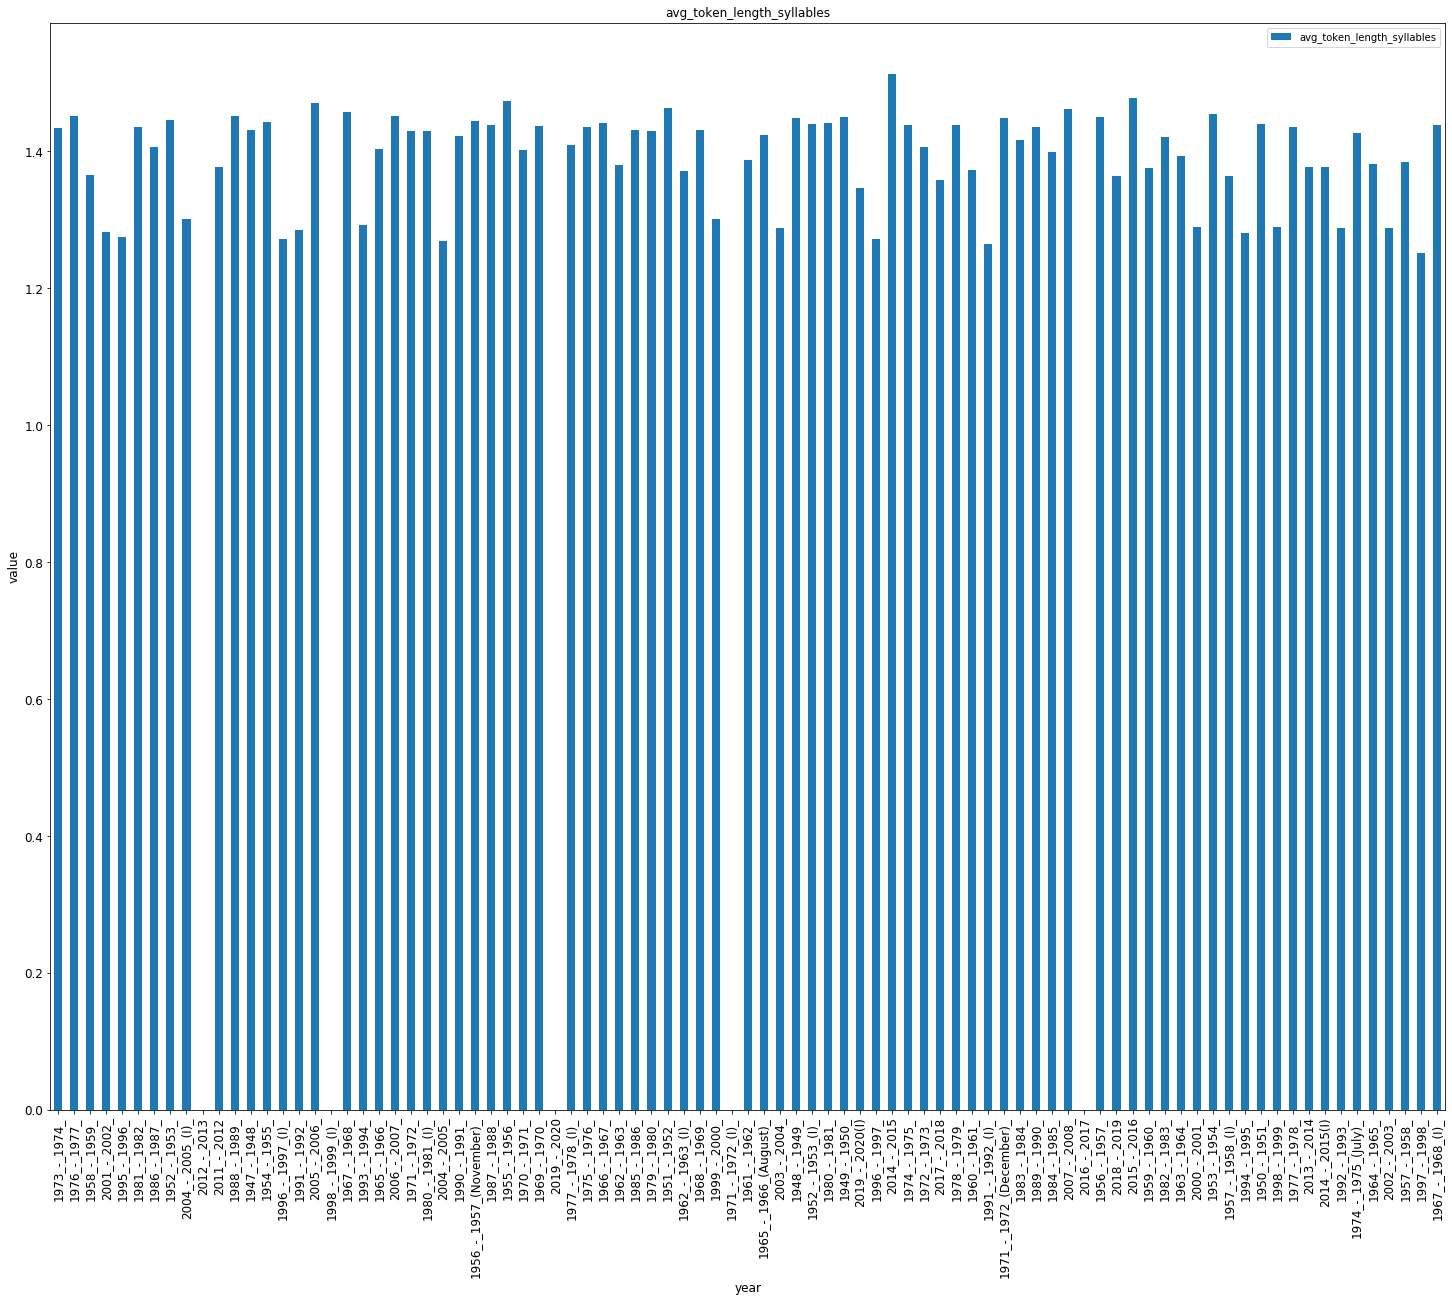

In [12]:
ax = new_df.plot(x='year', y='avg_token_length_syllables', kind='bar', title ="avg_token_length_syllables", figsize=(25, 20), legend=True, fontsize=12)
ax.set_xlabel("year", fontsize=12)
ax.set_ylabel("value", fontsize=12)
plt.show()